In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas import Series, DataFrame
from cobra.io import load_model
from cobra.flux_analysis import (
    flux_variability_analysis
)

model = load_model("iML1515")

In [15]:
solution = model.optimize()

solutionSeries = Series(solution)
solutionSeries

0    <Solution 0.877 at 0x7c46401307a0>
dtype: object

In [18]:
solution = model.optimize().objective_value

solutionSeries = Series(solution)
solutionSeries.values

array([0.87699721])

In [26]:
fva = flux_variability_analysis(
    model,
    model.reactions[:10],
    loopless=True
)

frame = pd.DataFrame(fva)
frame.sort_values(by="minimum", ascending=False)

,minimum,maximum
SHK3Dr,3.342403e-01,3.342403e-01
OMPDC,2.901063e-01,2.901063e-01
PYNP2r,2.167649e-12,2.294751e-02
CYTDK2,0.000000e+00,2.858328e-12
XPPT,0.000000e+00,-7.428496e-13
HXPRT,0.000000e+00,-2.086552e-13
NDPK6,0.000000e+00,-6.215604e-12
NDPK5,-2.294751e-02,1.143331e-11
NDPK8,-2.294751e-02,1.143331e-11
DHORTS,-2.901063e-01,-2.901063e-01


In [23]:
fva = flux_variability_analysis(
    model,
    model.reactions[:10],
    loopless=True
)

frame = pd.DataFrame(fva)
frame

,minimum,maximum
CYTDK2,0.000000e+00,2.858328e-12
XPPT,0.000000e+00,-7.428496e-13
HXPRT,0.000000e+00,-2.086552e-13
NDPK5,-2.294751e-02,1.143331e-11
SHK3Dr,3.342403e-01,3.342403e-01
NDPK6,0.000000e+00,-6.215604e-12
NDPK8,-2.294751e-02,1.143331e-11
DHORTS,-2.901063e-01,-2.901063e-01
OMPDC,2.901063e-01,2.901063e-01
PYNP2r,6.389153e-11,2.294751e-02


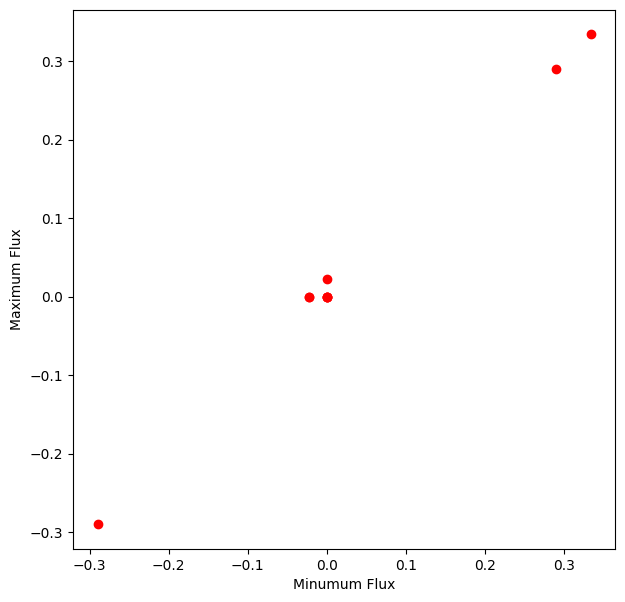

In [ ]:
fva = flux_variability_analysis(
    model,
    model.reactions[:10],
    loopless=True
)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

ax.scatter(
    fva["minimum"],
    fva["maximum"],
    marker="o",
    color="r"
)

ax.set_xlabel("Minumum Flux")
ax.set_ylabel("Maximum Flux")
plt.show()

# Some points overlap and labels are too small (Labels probably causes overlap?)

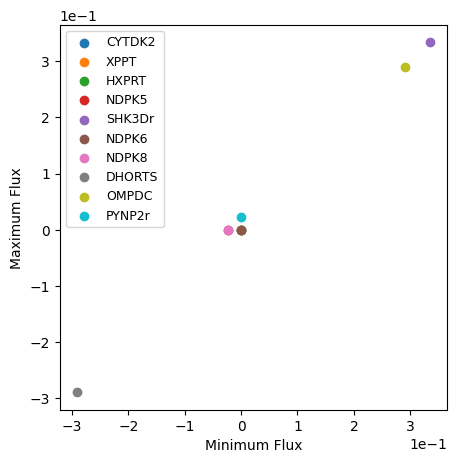

In [17]:
fva = flux_variability_analysis(
    model,
    model.reactions[:10],
    loopless=True
)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

colors = plt.cm.tab10(np.linspace(0, 1, len(fva)))

for (label, x, y), c in zip(fva.itertuples(), colors):
    ax.scatter(x, y, color=c, label=label)

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), fontsize=9, loc='best')

ax.set_xlabel("Minimum Flux")
ax.set_ylabel("Maximum Flux")
ax.ticklabel_format(style='sci', axis='both', scilimits=(0, 0))
plt.show()